# ENLSIP in Julia and patrimonial models

This package, described at https://uncertainlab.github.io/Enlsip.jl/, is the Julia version of ``ENLSIP`` (Easy Nonlinear Least Squares Inequality Program), an open-source Fortran77 library, available at http://plato.asu.edu/ftp/other_software/ENLSIP.tar.gz.

This type of problem is mathematically formulated as:
\begin{equation}\label{eq:cnlls}
         \quad \begin{aligned}  
                        \quad	\min_{x \in \mathbb{R}^n}        \quad&  \dfrac{1}{2} \sum_{i=1}^{m} r_i(x)^2  \\
                        \text{s.t.}      \quad & c_i(x)=0, \quad i =1,\ldots,q\\
                        & c_i(x) \geq 0, \quad i=q+1,\ldots,\ell,
        \end{aligned}
\end{equation}

where the functions $(r_1,\ldots,r_m)$, often denoted as the residuals, and constraints $(c_1,\ldots,c_\ell)$ are two-times differentiable.

## Chained Rosenbrock problem

Consider the following problem:
$$
\min \sum_{i=1}^{n−1} 100(x_i^2−x_{i+1})^2+(x_i−1)^2\\
\rm{s.t.\ } 3x_{k+1}^3+2x_{k+2}+\sin⁡(x_{k+1}−x_{k+2})\sin⁡(x_{k+1}+x_{k+2})+4x_{k+1}−x_k\exp⁡(x_k−x_{k+1})−8=0,\ k=1,\ldots,n−2,
$$
for a given natural number $n \geq 3$.

We use $n=1000$. Though analytic Jacobians are easy to define, we will rely on automatic differentiation.

In [ ]:
using Enlsip

In [ ]:
# Dimensions
n = 1000 # Number of variables
m = 2(n-1) # Number of residuals
nb_eq = n-2 # Number of equality constraints

# Residuals
function r(x::Vector)
    n = length(x)
    m = 2(n-1)
    rx = Vector{eltype(x)}(undef,m)
    rx[1:n-1] = [10(x[i]^2 - x[i+1]) for i=1:n-1]
    rx[n:m] = [x[k-n+1] - 1 for k=n:m]
    return rx
end

# Constraints
function c(x::Vector)
    n = length(x)
    cx = [3x[k+1]^3 + 2x[k+2] - 5 + sin(x[k+1]-x[k+2])*sin(x[k+1]+x[k+2]) + 4x[k+1] -
        x[k]*exp(x[k]-x[k+1]) - 3 for k=1:n-2]
    return cx
end

x0 = [(mod(i,2) == 1 ? -1.2 : 1.0) for i=1:n] # Starting point

# Instantiation of the model
Crmodel = CnlsModel(r,n,m; starting_point=x0, eq_constraints=c, nb_eqcons=nb_eq)

# Solving
Enlsip.solve!(Crmodel)

# Show solving status
Enlsip.status(Crmodel)

In [ ]:
Enlsip.solution(Crmodel)

## Numerical experiments on CM1 problems

The performance of the two versions have been compared on problems derived from Hydro-Québec operations and also problems from the literature. We illustrate this comparison on the estimation of CM1 (Carole Mercier-1) model parameters; it is a nonlinear regression model used for the hourly load forecast [@grenieretal:2006]. The calibration process requires the use of weather data collected across the province of Quebec. The configuration of this model can be adapted to the number of parameters to be calibrated and the amount of data to be used. In total, 90 different instances can be thus defined with the following features:

- from 258 to 726 parameters,
- from 468 to 716 total constraints (with 2 to 10 equalities),
- from 4392 to 17,568 residuals.

Dolan-Moré performance profile (Dolan & Moré, 2002)

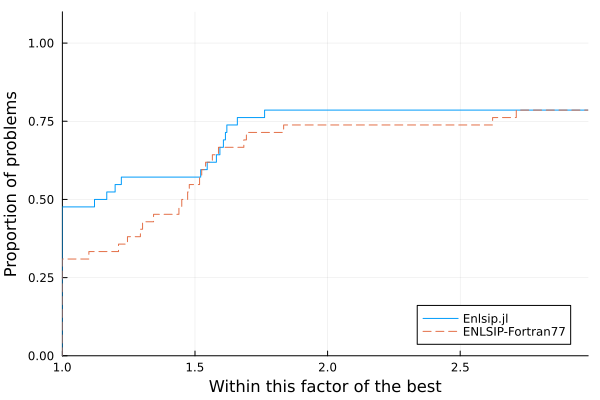